In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("Ogurcov.csv")
df.loc[df["Year"] > 0.05, "Year"] = 1
df.loc[df["Year"] < 0.05, "Year"] = 0
df.Year = df.Year.astype(int)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,14941,0.982699,0.055262,0,0.004805,0.172993,0.000048,0.000024,0.000000,0.000000,0.000048
1,9817,0.957675,0.013714,1,0.022856,0.278846,0.000206,0.000046,0.000000,0.000000,0.000274
2,9224,0.998794,0.029204,0,0.013629,0.001947,0.000136,0.000000,0.000117,0.000019,0.000273
3,15756,0.993582,0.061586,1,0.004106,0.008211,0.000000,0.000000,0.000082,0.000000,0.000082
4,1398,0.969732,0.119720,1,0.000000,0.179580,0.005208,0.002275,0.000000,0.000778,0.008321
...,...,...,...,...,...,...,...,...,...,...,...
548,14766,0.986850,0.072073,1,0.005544,0.011088,0.000000,0.000000,0.000166,0.000000,0.000166
549,9554,0.272252,0.096089,1,0.160148,0.912844,0.001601,0.000480,0.000000,0.000000,0.002082
550,2693,0.955949,0.219868,1,0.057357,0.105154,0.003441,0.003633,0.000000,0.000287,0.007265
551,6026,0.990691,0.016615,0,0.012462,0.132923,0.000478,0.000125,0.000000,0.000000,0.000602


In [22]:
Y = df['Year'] #правильно
X = df.drop(columns=['Year']) #предугадано
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
dtc_plot = DecisionTreeClassifier()
dtc_plot = dtc_plot.fit(x_train.iloc[::1],y_train.iloc[::1])

[Text(0.43786951013513514, 0.9615384615384616, 'x[1] <= 0.954\ngini = 0.428\nsamples = 442\nvalue = [137, 305]'),
 Text(0.14527027027027026, 0.8846153846153846, 'x[1] <= 0.932\ngini = 0.133\nsamples = 210\nvalue = [15, 195]'),
 Text(0.06756756756756757, 0.8076923076923077, 'x[9] <= 0.0\ngini = 0.048\nsamples = 164\nvalue = [4, 160]'),
 Text(0.04054054054054054, 0.7307692307692307, 'x[0] <= 14766.0\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.02702702702702703, 0.6538461538461539, 'x[3] <= 0.02\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.013513513513513514, 0.5769230769230769, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.04054054054054054, 0.5769230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05405405405405406, 0.6538461538461539, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.0945945945945946, 0.7307692307692307, 'x[7] <= 0.006\ngini = 0.014\nsamples = 144\nvalue = [1, 143]'),
 Text(0.08108108108108109, 0.6538461538461539, 'gini = 0.0

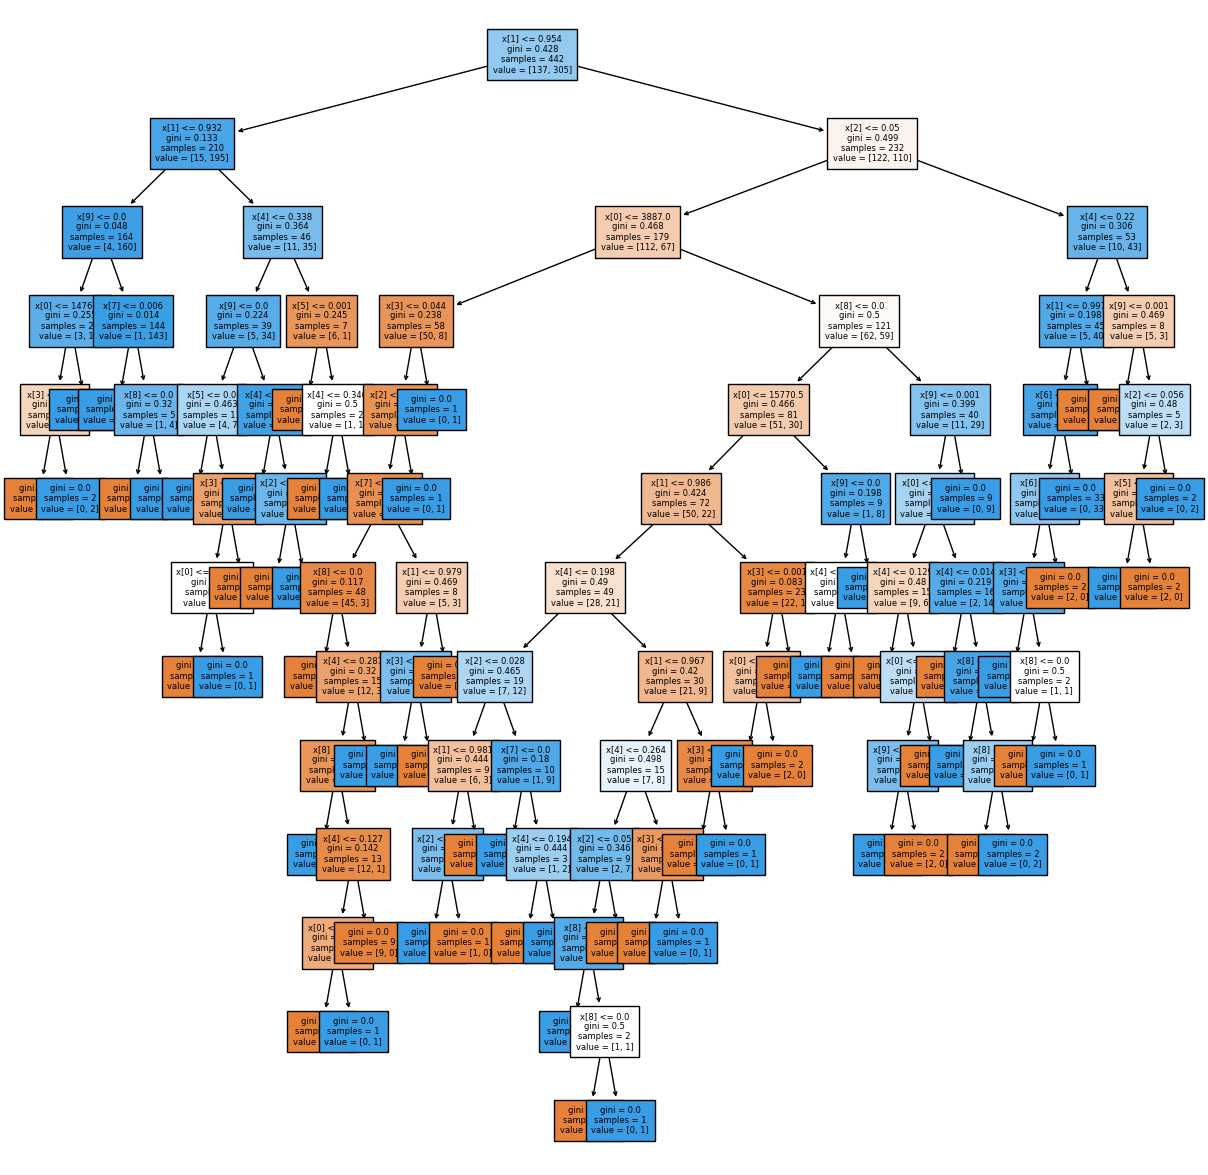

In [24]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtc_plot,filled=tree,fontsize=6)

In [25]:
y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test,y_predict)
con_mat

array([[36, 13],
       [12, 50]], dtype=int64)

Text(50.722222222222214, 0.5, 'real')

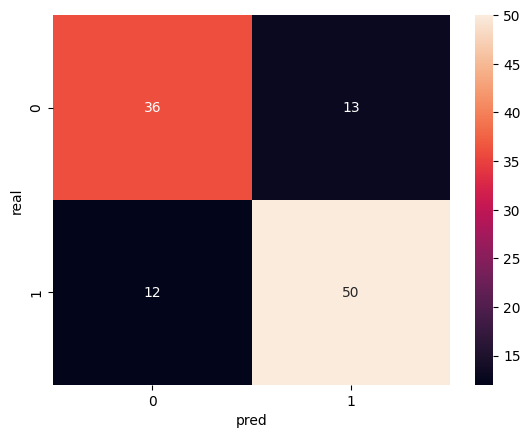

In [26]:
sns.heatmap(con_mat,annot=True,fmt="d")
plt.xlabel('pred')
plt.ylabel('real')

In [27]:
print('accuracy_score',metrics.accuracy_score(y_test,y_predict))
print('recall_score',metrics.recall_score(y_test,y_predict))

accuracy_score 0.7747747747747747
recall_score 0.8064516129032258


In [28]:
print('precision_score',metrics.precision_score(y_test,y_predict))

precision_score 0.7936507936507936


In [29]:
print('f1_score',metrics.f1_score(y_test,y_predict))

f1_score 0.7999999999999999


In [30]:
dtc_plot = DecisionTreeClassifier(max_depth=2,min_samples_leaf=2,max_leaf_nodes=5)
dtc_plot = dtc_plot.fit(x_train.iloc[::1],y_train.iloc[::1])

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.954\ngini = 0.428\nsamples = 442\nvalue = [137, 305]'),
 Text(0.25, 0.5, 'x[1] <= 0.932\ngini = 0.133\nsamples = 210\nvalue = [15, 195]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.048\nsamples = 164\nvalue = [4, 160]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.364\nsamples = 46\nvalue = [11, 35]'),
 Text(0.75, 0.5, 'x[2] <= 0.05\ngini = 0.499\nsamples = 232\nvalue = [122, 110]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.468\nsamples = 179\nvalue = [112, 67]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.306\nsamples = 53\nvalue = [10, 43]')]

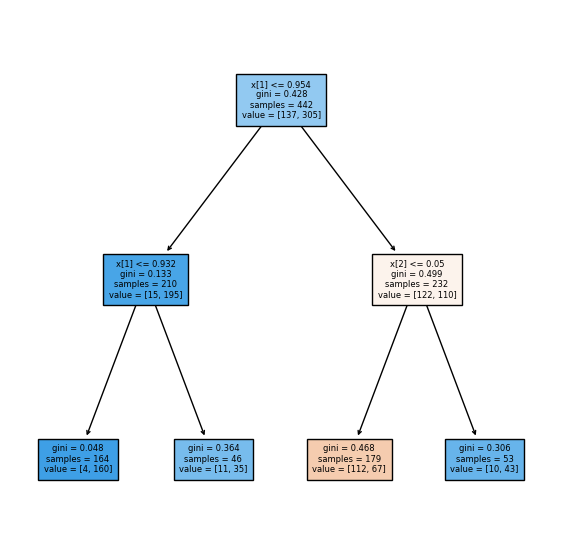

In [31]:
plt.figure(figsize=(7,7))
tree.plot_tree(dtc_plot,filled=tree,fontsize=6)

In [32]:
print('accuracy_score',metrics.accuracy_score(y_test,y_predict))
print('recall_score',metrics.recall_score(y_test,y_predict))
print('precision_score',metrics.precision_score(y_test,y_predict))
print('f1_score',metrics.f1_score(y_test,y_predict))
print('confusion_matrix',metrics.confusion_matrix(y_test,y_predict))

accuracy_score 0.7747747747747747
recall_score 0.8064516129032258
precision_score 0.7936507936507936
f1_score 0.7999999999999999
confusion_matrix [[36 13]
 [12 50]]
